# Tweets Airline Project - Exploratory Data Analysis
***

## Contents
- [Imports](#Imports)
- [Load The Data](#Load_The_Data)
- [Explore The Data](#Explore_The_Data)
  - [Overall Distribution of Subscription](#Overall_Distribution_of_Subscription)
  - [Correct The Feature Name](#Correct_The_Feature_Name)
  - [Overall Distribution of Airline Sentiments](#Overall_Distribution_of_Airline_Sentiments)
  - [%Sentiments By Different Airlines](#Sentiments_by_Different_Airlines)
   - [Statistic Significance](#Statistic_Significance_Airlines)
  - [%Sentiments By Retweets](#Sentiments_by_Retweets)
   - [Statistic Significance](#Statistic_Significance_Retweet)
  - [%Sentiments By Tweet Locations](<#Sentiments_By_Tweet_Locations)
   - [Statistic Significance](#Statistic_Significance_Regions)
  - [The Negative Reasons](#The_Negative_Reasons)
  - [%Negative Reasons By Airlines](#%Negative_Reasons_By_Airlines) 
   - [Statistic Significance](#Statistic_Significance_Negative_Reasons) 
  - [%Sentiments by Tweets Created Hour](#Sentiments_by_Tweets_Created_Hour)
   - [Statistic Significance](#Statistic_Significance_Hour) 
  - [Hashtags](#Hashtags)
  - [Mentions](#Mentions)
  - [Textstat](#Textstat)
   - [Text Difficulty](#Difficulty)
   - [Text Length](#Length)
- [Save The Data](#Save_The_Data)


### Imports<a id='Imports'></a>
***

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

import os

from sklearn import preprocessing
from scipy.stats import chi2_contingency
import scipy.stats as ss



import warnings
warnings.filterwarnings('ignore')

### Load The Data<a id='Load_The_Data'></a>
***

In [50]:
tweets_cleaned = pd.read_csv('../data/tweets_cleaned.csv', index_col=0)

In [51]:
tweets_cleaned.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location,user_timezone,created_date,created_hour
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,Eastern Time (US & Canada),2015-02-24,11
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,Pacific Time (US & Canada),2015-02-24,11
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,Lets Play,Central Time (US & Canada),2015-02-24,11
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,Pacific Time (US & Canada),2015-02-24,11
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,Pacific Time (US & Canada),2015-02-24,11


In [52]:
tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 0 to 14639
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_location                9907 non-null   object 
 10  user_timezone                 9820 non-null   object 
 11  created_date                  14640 non-null  object 
 12  created_hour                  14640 non-null  int64  
dtypes

### Explore The Data<a id='Explore_The_Data'></a>
***

####  Correct The Feature Name<a id='Correct_The_Feature_Name'></a>

In [53]:
#check if the 'airline' column value 'Delta' contains many texts on Delta;
tweets_cleaned[tweets_cleaned.airline == 'Delta'].text.str.contains('JetBlue').value_counts()

True     2172
False      50
Name: text, dtype: int64

In [54]:
tweets_cleaned[tweets_cleaned.airline == 'Delta'].text.str.contains('jetblue').value_counts()

False    2115
True      107
Name: text, dtype: int64

In [55]:
tweets_cleaned[tweets_cleaned.airline == 'Delta'].text.str.contains('Delta').value_counts()

False    2217
True        5
Name: text, dtype: int64

In [56]:
tweets_cleaned[tweets_cleaned.airline == 'Delta'].text.str.contains('delta').value_counts()

False    2219
True        3
Name: text, dtype: int64

In [57]:
tweets_cleaned[tweets_cleaned.airline == 'Delta'][tweets_cleaned[tweets_cleaned.airline == 'Delta'].text.str.contains('JetBlue')].text

6746    @JetBlue Yesterday on my way from EWR to FLL j...
6747    @JetBlue I hope so because I fly very often an...
6748                 @JetBlue flight 1041 to Savannah, GA
6749    @JetBlue They weren't on any flight, they just...
6750    @JetBlue everyone is here but our pilots are n...
                              ...                        
8961    @JetBlue No worries. Delay was minor and dealt...
8962    @JetBlue Thanks! Her flight leaves at 2 but sh...
8963    @JetBlue CEO weighs profits, flyers - @Chronic...
8964    @JetBlue is REALLY getting on my nerves !! 😡😡 ...
8965    @JetBlue's new CEO seeks the right balance to ...
Name: text, Length: 2172, dtype: object

Strangely, the 'airline' column value 'Delta' doesn't contain many texts on Delta; instead, most of the text relates to JetBlue or jetblue.

In [58]:
# Replace the 'airline' column value 'Delta' with 'JetBlue.' 
tweets_cleaned['airline'] = tweets_cleaned['airline'].replace('Delta', 'JetBlue')

In [59]:
tweets_cleaned.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
JetBlue           2222
Virgin America     504
Name: airline, dtype: int64

####  Overall Distribution of Airline Sentiments<a id='Overall_Distribution_of_Airline_Sentiments'></a>

In [60]:
overall_percent = tweets_cleaned.airline_sentiment.value_counts(normalize = True).transpose()

overall_percent


negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

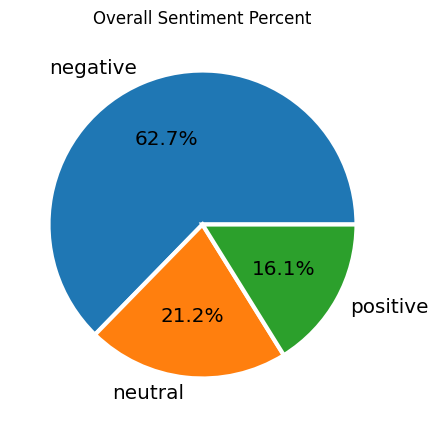

In [61]:
mylabels = ['negative', 'neutral','positive']

plt.pie(overall_percent, labels = mylabels, autopct='%.1f%%',  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.title("Overall Sentiment Percent")
    
plt.show()

For the six airlines, 62.7% of the sentiment is negative, compared to 21.2% neutral and 16.1% positive.

####  %Sentiments By Different Airlines<a id='Sentiments_by_Different_Airlines'></a>

In [62]:
tweets_cleaned.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
JetBlue           2222
Virgin America     504
Name: airline, dtype: int64

In [63]:
United_percent = tweets_cleaned[tweets_cleaned.airline == 'United'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('United').transpose()
Airways_percent  = tweets_cleaned[tweets_cleaned.airline == 'US Airways'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('Airways').transpose()
American_percent  = tweets_cleaned[tweets_cleaned.airline == 'American'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('American').transpose()
Southwest_percent  = tweets_cleaned[tweets_cleaned.airline == 'Southwest'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('Southwest').transpose()
JetBlue_percent  = tweets_cleaned[tweets_cleaned.airline == 'JetBlue'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('JetBlue').transpose()
Virgin_percent  = tweets_cleaned[tweets_cleaned.airline == 'Virgin America'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('Virgin').transpose()
#Combine each airline sentiments value_counts percent into one dataframe
df_senti_airline = pd.concat([United_percent, Airways_percent, American_percent, Southwest_percent, JetBlue_percent, Virgin_percent])


In [64]:
#Reset index and rename the columns for plot
df_senti_airline = df_senti_airline.reset_index()
df_senti_airline.columns = ['airlines', 'negative', 'neutral', 'positive']
df_senti_airline

,airlines,negative,neutral,positive
0,United,0.688906,0.182365,0.128728
1,Airways,0.776862,0.130793,0.092345
2,American,0.710402,0.167814,0.121783
3,Southwest,0.490083,0.274380,0.235537
4,JetBlue,0.429793,0.325383,0.244824
5,Virgin,0.359127,0.339286,0.301587


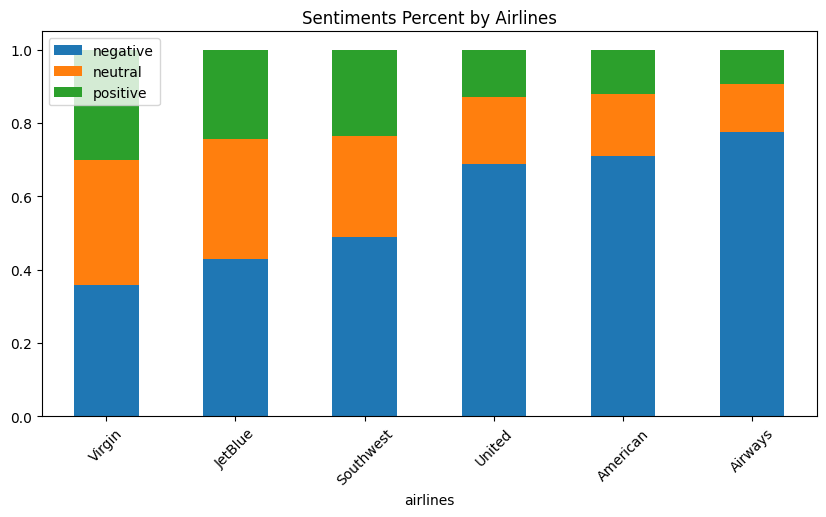

In [65]:
#Sort out the dataframe by 'negative' sentiment percent and plot the dataframe
df_senti_airline_sorted = df_senti_airline.sort_values(['negative'])
df_senti_airline_sorted.plot(x='airlines', kind='bar', stacked=True,
        title='Sentiments Percent by Airlines')
plt.xticks(rotation=45)
plt.show()

Airways, American, and United airlines have more than 70% negative sentiments. They are also the three airlines that have the most tweets. Virgin, JetBlue, and Southwest airlines have 50% or less negative sentiments, which is lower than the average 62.7%. It is to be noted that those airlines have half or fewer tweets than the other three airlines. Virgin airline, in particular, has only about 500 tweets, only a quarter of the tweets regarding JetBlue, which has the second least tweets. 

Despite the size differences, the 1:1 ratio of the neutral and positive sentiments stay relatively consistent throughout the six airlines. 


####  Statistic Significance<a id='Statistic_Significance_Airlines'></a>

In [66]:
from itertools import combinations
from scipy.stats import chi2_contingency
from statsmodels.sandbox.stats.multicomp import multipletests

def get_asterisks_for_pval(p_val):
    if p_val > 0.05:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text

#Check if the differences between three or more groups are statistic significant
def chisq_and_posthoc_corrected(df):
    all_combinations = list(combinations(df.index, 2))  
    p_vals = []
    print("Significance results:")
    
    for comb in all_combinations:
        new_df = df[(df.index == comb[0]) | (df.index == comb[1])]
        chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
        p_vals.append(p)

    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")
        
   

In [101]:
#Creaate a dataframe of sentiments counts by airlines
United_count = tweets_cleaned[tweets_cleaned.airline == 'United'].airline_sentiment.value_counts().rename_axis().to_frame('United').transpose()
Airways_count  = tweets_cleaned[tweets_cleaned.airline == 'US Airways'].airline_sentiment.value_counts().rename_axis().to_frame('Airways').transpose()
American_count  = tweets_cleaned[tweets_cleaned.airline == 'American'].airline_sentiment.value_counts().rename_axis().to_frame('American').transpose()
Southwest_count  = tweets_cleaned[tweets_cleaned.airline == 'Southwest'].airline_sentiment.value_counts().rename_axis().to_frame('Southwest').transpose()
JetBlue_count  = tweets_cleaned[tweets_cleaned.airline == 'JetBlue'].airline_sentiment.value_counts().rename_axis().to_frame('JetBlue').transpose()
Virgin_count  = tweets_cleaned[tweets_cleaned.airline == 'Virgin America'].airline_sentiment.value_counts().rename_axis().to_frame('Virgin').transpose()
df_senti_ailrinecount = pd.concat([United_count, Airways_count, American_count, Southwest_count, JetBlue_count, Virgin_count])

chisq_and_posthoc_corrected(df_senti_ailrinecount)

Significance results:
('United', 'Airways'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('United', 'American'): p_value: 0.165312; corrected: 0.165312 (ns) reject: False
('United', 'Southwest'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('United', 'JetBlue'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('United', 'Virgin'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Airways', 'American'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Airways', 'Southwest'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Airways', 'JetBlue'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Airways', 'Virgin'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('American', 'Southwest'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('American', 'JetBlue'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('American', 'Virgin'): p_value: 0.000000; corrected: 0.000000 

All the airlines were statistically significantly (p<0.001) different from each other except United and American airlines.

#### %Sentiments By Retweets<a id='Sentiments_by_Retweets'></a>

In [69]:
tweets_cleaned.retweet_count.value_counts().head()

0    13873
1      640
2       66
3       22
4       17
Name: retweet_count, dtype: int64

In [70]:
#Divide retweets into three groups: 0, 1 and multiple
zero_retweet_percent = tweets_cleaned[tweets_cleaned.retweet_count == 0].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('0 retweet').transpose()
one_retweet_percent = tweets_cleaned[tweets_cleaned.retweet_count == 1].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('1 retweet').transpose()
multiple_retweet_percent = tweets_cleaned[tweets_cleaned.retweet_count >=2].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('multiple retweet').transpose()
#Combine dataframes into one
df_senti_retweet = pd.concat([zero_retweet_percent, one_retweet_percent, multiple_retweet_percent])
df_senti_retweet = df_senti_retweet.reset_index()
df_senti_retweet.columns = ['retweet_count', 'negative', 'neutral', 'positive']
df_senti_retweet


,retweet_count,negative,neutral,positive
0,0 retweet,0.618540,0.216608,0.164853
1,1 retweet,0.818750,0.098437,0.082812
2,multiple retweet,0.574803,0.244094,0.181102


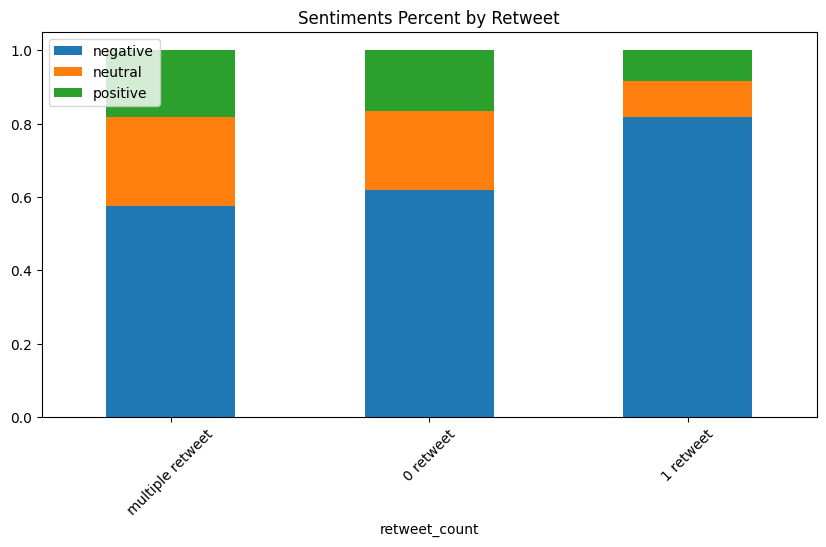

In [71]:
##Sort out the dataframe by 'negative' sentiment percent and plot the dataframe

df_senti_retweet_sorted = df_senti_retweet.sort_values(['negative'])
df_senti_retweet_sorted.plot(x='retweet_count', kind='bar', stacked=True,
        title='Sentiments Percent by Retweet')
plt.xticks(rotation=45)

plt.show()

The tweets that were retweeted once had 80% negative sentiment, compared to 60% or a little less for zero retweets and multiple retweets. Again, the 1:1 ratio of the neutral and positive sentiments stays relatively consistent throughout the three retweets scenarios. 

####  Statistic Significance<a id='Statistic_Significance_Retweet'></a>

In [100]:
#Create a dataframe of sentiments counts by retweets
zero_retweet_count = tweets_cleaned[tweets_cleaned.retweet_count == 0].airline_sentiment.value_counts().rename_axis().to_frame('0 retweet').transpose()
one_retweet_count = tweets_cleaned[tweets_cleaned.retweet_count == 1].airline_sentiment.value_counts().rename_axis().to_frame('1 retweet').transpose()
multiple_retweet_count = tweets_cleaned[tweets_cleaned.retweet_count >=2].airline_sentiment.value_counts().rename_axis().to_frame('multiple retweet').transpose()
df_senti_retweetcount = pd.concat([zero_retweet_count, one_retweet_count, multiple_retweet_count])

chisq_and_posthoc_corrected(df_senti_retweetcount)

Significance results:
('0 retweet', '1 retweet'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('0 retweet', 'multiple retweet'): p_value: 0.597713; corrected: 0.597713 (ns) reject: False
('1 retweet', 'multiple retweet'): p_value: 0.000000; corrected: 0.000000 (****) reject: True


All the retweet groups were statistically significantly (p<0.001) different from each other except for the zero and multiple retweets groups.

#### %Sentiments By Tweet Locations<a id='Sentiments_By_Tweet_Locations'></a>

In [76]:
locs = tweets_cleaned['tweet_location'].value_counts()
#Choose the locations that appear more than 10 times
locs = locs[locs>=10].rename_axis('location').to_frame('counts').reset_index()
locs.head()

,location,counts
0,"Boston, MA",157
1,"New York, NY",156
2,"Washington, DC",150
3,New York,127
4,USA,126


In [77]:
list(locs.location)[:5] 

['Boston, MA', 'New York, NY', 'Washington, DC', 'New York', 'USA']

In [78]:
#The US Census Bureau divides the United States into four regions. 
mapping = { 'WashingtonDC':'the South', 
 'BostonMA': 'the Northeast',
 'NewYorkNY': 'the Northeast',
 'NewYork': 'the Northeast',
 'NewYorkCity': "the Northeast",
 'NYC': "the Northeast",
 'SanFranciscoCA': 'the West',
 'LosAngelesCA': 'the West',
 'ChicagoIL': 'the Midwest',
 'SanFrancisco': 'the West',
 'LosAngeles': 'the West',
 'BrooklynNY': 'the Northeast',
 'AustinTX': 'the South',
 'DallasTX': 'the South',
 'dallasTX': 'the South',          
 'NashvilleTN': 'the South',
 'NY': 'the Northeast',
 'PhiladelphiaPA': 'the Northeast',
 'HoustonTX': 'the South',
 'SanDiego': 'the West',
 'DenverCO': 'the West',
 'RaleighNC': 'the South',
 'LoganInternationalAirport': 'the Northeast',
 'NewYorkNewYork': 'the West',
 'ArlingtonVA': 'the South',
 'CT': 'the Northeast',
 'LasVegasNV': 'the West',
 'NewJersey': 'the Northeast',
 'SanDiegoCA': 'the West',
 'Pekin': 'the Midwest',
 'SeattleWA': 'the West',
 'LasVegas': 'the West',
 'AtlantaGA': 'the South',
 'newyorkcity': 'the Northeast',
 'BelleMO': 'the Midwest',
 'DallasTexas': 'the South',
 'McKinneyTX': 'the South',
 'AshevilleNC': 'the South',
 'TallahasseeFL': 'the South',
 'LongIslandNY': 'the Northeast',
 'CambridgeMA': 'the Northeast',
 'RhodeIsland': 'the Northeast',
 'HoustonTexas': 'the South',
 'MemphisTN': 'the South',
 'OttawaCanada': 'Ottawa, Canada',
 'BaltimoreMD': 'the Northeast',
 'PhoenixAZ': 'the South',
 'NewHavenCT': 'the Northeast',
 'NewYorkCityNY': 'the Northeast',
 'AustinTexas': 'the South',
 'PittsburghPA': 'the Northeast',
 'CharlotteNC': 'the South',
 'ColumbusOhio': 'the Midwest',
 'ClevelandOH': 'the Midwest',
 'NJ': 'the Northeast',
 'washingtondc': 'the South',
 'LongIslandArizona': 'the South',
 'Denver': 'the West',
 'PortlandOR': 'the West',
 'ColumbusOH': 'the Midwest',
 'ProvidenceRI': 'Providence, RI',
 'RochesterNY': 'the Northeast',
 'HobokenNJ': 'the Northeast',
 'UnitedStates': 'USA',
 'Dallas': "the South",
 'PlanoTexas': "the South",
 'BayAreaCA': "the West",
 'PortlandMaine': 'the Northeast',
 'KansasCityMO': 'the Midwest',
 'EnglewoodFlorida': 'the South',
 'OrlandoFL': 'the South',
 'VancouverWA': 'Vancouver, WA',
 'AlexandriaVA': 'the South',
 'StLouisMO': 'the Midwest',
 'NYCATL': 'the South',
 'MinneapolisMN': 'the Midwest', 
 'MiamiFL': 'the South',
 'NewEngland': 'the Northeast',
 'NorthernVirginia': 'the South',
 'nyc': 'the Northeast',
 'ClevelandOhio': 'the Midwest',
 'SouthFlorida': 'the South',
 'LouisvilleKY': 'the South',
 'newyork': 'the Northeast',
 'MexicoCity': 'Mexico',
 'WellesleyMA': 'the Northeast',
 'CharlestonSC': 'the South',
 'SanFranciscoBayArea': 'the West',
 'Memphis': 'the South',
 'US': 'USA',
 'DC':'the South',
 'FortLauderdale': 'the South',
 'BuffaloNY': 'the Northeast',
 'LosAngelesCalifornia': 'the West',
 'MontereyCountyCA': 'the West',
 'NorthWestofEngland': 'England',
 'SanFranciscoCalifornia': 'the West',
 'MilwaukeeWI': 'the Midwest',
 'RussiaРоссия': 'Russia',
 'CharlottesvilleVA':'the South' ,
 'ScottsdaleAZ':'the West',
 'usafruk': 'USA',
 'NorthCarolina': 'the West',
 'DFW':'the South',
 'Chicago': 'the Midwest',
 'theSouth': 'the South',
 'Boston': 'the Northeast',
 'Texas': 'the South',
 'theNorteast': 'the Northeast',
 'Connecticut': 'the Northeast',
 'Seattle': 'the West',
 'Brooklyn': 'the Northeast',
 'theMidwest': 'the Midwest',
 'Colorado': 'the West',
 'Houston': 'the South',
 'California': 'the West',
 'Virginia': 'the South',
 'Ohio': 'the Northeast',
 'Providence, RI': 'the Northeast',
 'Michigan': 'the Midwest',
 'Pennsylvania': 'the Northeast',
 'Miami': 'the South',
 'Philadelphia': 'the Northeast',
 'Indianapolis': 'the Northeast',
 'Florida': 'the South',
 'Irvine': 'the West',
 'Indiana': 'the Midwest',
 'Wellesley, MA': 'the Northeast',
 'Atlanta': 'the South',
 'Merrick': 'the Northeast',
 'Maryland': 'the Northeast',
 'Kentucky':'the South',
 'Massachusetts':'the Northeast'         
          }


In [79]:
tweets_cleaned['tweet_location'] = tweets_cleaned['tweet_location'].apply(lambda x: mapping[x] if x in mapping.keys() else x)
tweets_cleaned['tweet_location'].value_counts().head(10)


the Northeast      389
the South          198
Boston, MA         157
New York, NY       156
the Midwest        154
Washington, DC     150
USA                135
New York           127
the West            98
Los Angeles, CA     96
Name: tweet_location, dtype: int64

In [80]:
#Only choose US data that specified the locations
US_region_data = tweets_cleaned[tweets_cleaned['tweet_location'].isin(['the Northeast', 'the South', 'the West', 'the Midwest'])]
US_region_data.shape


(839, 13)

In [81]:
#There are more US data out there without specific locations
US_data = tweets_cleaned[tweets_cleaned['tweet_location'].isin(['the Northeast', 'the South', 'the West', 'the Midwest', 'USA', 'US'])] 
US_data.shape

(974, 13)

In [82]:
West_percent = US_region_data[US_region_data.tweet_location =='the West'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('the West').transpose()
Northeast_percent = US_region_data[US_region_data.tweet_location =='the Northeast'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('the Northeast').transpose()
Midwest_percent = US_region_data[US_region_data.tweet_location =='the Midwest'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('the Midwest').transpose()
South_percent = US_region_data[US_region_data.tweet_location =='the South'].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('the South').transpose()
#Combine dataframes into one
df_senti_us = pd.concat([West_percent, Northeast_percent, Midwest_percent, South_percent])
df_senti_us = df_senti_us.reset_index()
df_senti_us.columns = ['regions', 'negative', 'neutral', 'positive']
df_senti_us['regions'] = df_senti_us['regions'].map({'the West': 'West', 'the Northeast': 'Northeast', 'the Midwest': 'Midwest', 'the South': 'South'})
df_senti_us

,regions,negative,neutral,positive
0,West,0.653061,0.173469,0.173469
1,Northeast,0.616967,0.213368,0.169666
2,Midwest,0.727273,0.129870,0.142857
3,South,0.666667,0.146465,0.186869


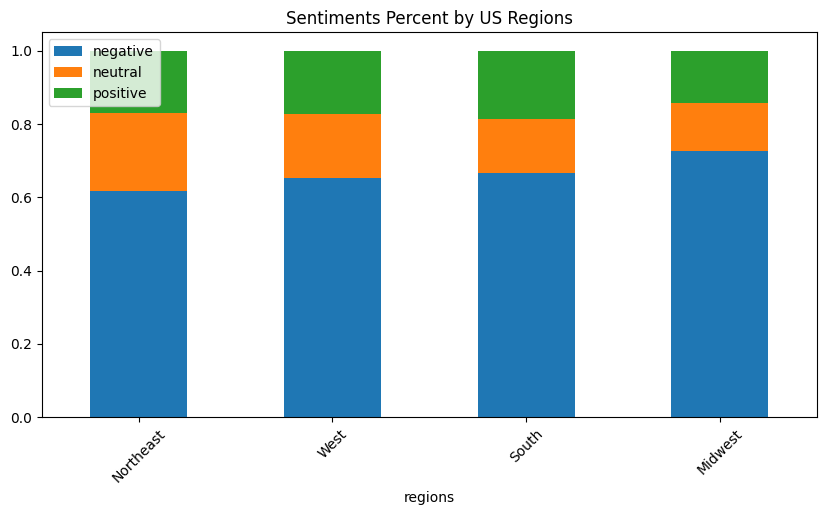

In [83]:
#Sort out the dataframe by 'negative' sentiment percent and plot the data
df_senti_us_sorted = df_senti_us.sort_values(['negative'])
plt.rcParams["figure.figsize"] = (10, 5)
df_senti_us_sorted.plot(x='regions', kind='bar', stacked=True,
        title='Sentiments Percent by US Regions')
plt.xticks(rotation=45)
plt.show()

Northeast, West, and South have almost identical sentiment distributions with about 60% negative sentiment, 20% neutral sentiment, and 20% positive sentiment. At the same time, the Midwest has about 70% negative sentiments and double as neutral sentiments as positive sentiments. It’s noticeable that the Midwest only has half of the tweets of the second lowest tweets region, the West, and a quarter of the most tweets region, the Northeast. 

####  Statistic Significance<a id='Statistic_Significance_Regions'></a>

In [99]:
##Create a dateframe of negatve reasons counts by regions

West_count = US_region_data[US_region_data.tweet_location =='the West'].airline_sentiment.value_counts().rename_axis().to_frame('the West').transpose()
Northeast_count = US_region_data[US_region_data.tweet_location =='the Northeast'].airline_sentiment.value_counts().rename_axis().to_frame('the Northeast').transpose()
Midwest_count = US_region_data[US_region_data.tweet_location =='the Midwest'].airline_sentiment.value_counts().rename_axis().to_frame('the Midwest').transpose()
South_count = US_region_data[US_region_data.tweet_location =='the South'].airline_sentiment.value_counts().rename_axis().to_frame('the South').transpose()
df_senti_uscount = pd.concat([West_count, Northeast_count, Midwest_count, South_count])

chisq_and_posthoc_corrected(df_senti_uscount)

Significance results:
('the West', 'the Northeast'): p_value: 0.678116; corrected: 0.813740 (ns) reject: False
('the West', 'the Midwest'): p_value: 0.447032; corrected: 0.670547 (ns) reject: False
('the West', 'the South'): p_value: 0.822645; corrected: 0.822645 (ns) reject: False
('the Northeast', 'the Midwest'): p_value: 0.036609; corrected: 0.219656 (*) reject: False
('the Northeast', 'the South'): p_value: 0.148758; corrected: 0.446275 (ns) reject: False
('the Midwest', 'the South'): p_value: 0.442317; corrected: 0.670547 (ns) reject: False


The difference between the Midwest and the rest of the regions is statistically significant. (p<0.05). 

#### The Negative Reasons<a id='The_Negative_Reasons'></a>

In [86]:
negative_reasons = tweets_cleaned['negativereason'].value_counts(normalize=True)
negative_reasons

Customer Service Issue         0.317063
Late Flight                    0.181412
Can't Tell                     0.129658
Cancelled Flight               0.092286
Lost Luggage                   0.078884
Bad Flight                     0.063195
Flight Booking Problems        0.057638
Flight Attendant Complaints    0.052408
longlines                      0.019394
Damaged Luggage                0.008063
Name: negativereason, dtype: float64

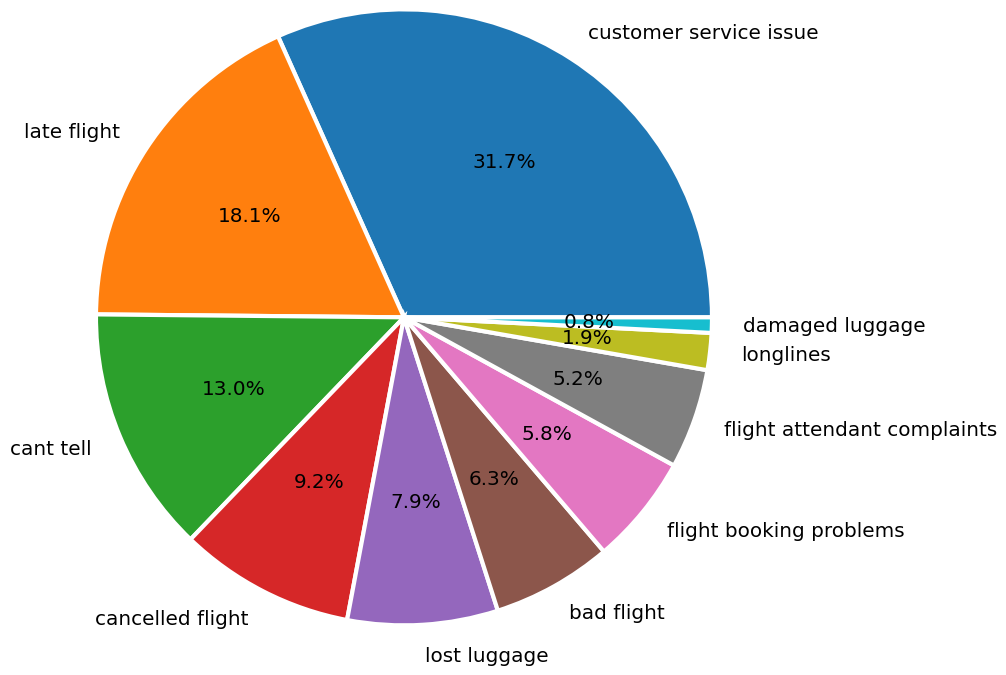

In [87]:
plt.rcParams["figure.figsize"] = (10, 5)
reason_labels = ['customer service issue', 'late flight','cant tell', 'cancelled flight', 'lost luggage', 'bad flight', 'flight booking problems', 'flight attendant complaints', 'longlines', 'damaged luggage']

plt.pie(negative_reasons, autopct='%.1f%%', labels = reason_labels,  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},radius =2)

plt.show()

#### %Negative Reasons By Airlines <a id='%Negative_Reasons_By_Airlines'></a>

In [88]:
United_neg = tweets_cleaned[tweets_cleaned.airline == 'United'].negativereason.value_counts(normalize = True).rename_axis().to_frame('United').transpose()
Airways_neg  = tweets_cleaned[tweets_cleaned.airline == 'US Airways'].negativereason.value_counts(normalize = True).rename_axis().to_frame('Airways').transpose()
American_neg  = tweets_cleaned[tweets_cleaned.airline == 'American'].negativereason.value_counts(normalize = True).rename_axis().to_frame('American').transpose()
Southwest_neg  = tweets_cleaned[tweets_cleaned.airline == 'Southwest'].negativereason.value_counts(normalize = True).rename_axis().to_frame('Southwest').transpose()
JetBlue_neg  = tweets_cleaned[tweets_cleaned.airline == 'JetBlue'].negativereason.value_counts(normalize = True).rename_axis().to_frame('JetBlue').transpose()
Virgin_neg  = tweets_cleaned[tweets_cleaned.airline == 'Virgin America'].negativereason.value_counts(normalize = True).rename_axis().to_frame('Virgin').transpose()
#Combine dataframes into one
df_neg_airline = pd.concat([United_neg, Airways_neg, American_neg, Southwest_neg, JetBlue_neg, Virgin_neg])
df_neg_airline = df_neg_airline.reset_index()
df_neg_airline.columns = ['airlines', 'Customer Service Issue', 'Late Flight', 
                          'Cant tell', 'Lost Luggage','Bad Flight', 'Cancelled Flight', 'Flight Attendant Complaints',
       'Flight Booking Problems', 'longlines', 'Damaged Luggage']
df_neg_airline


,airlines,Customer Service Issue,Late Flight,Cant tell,Lost Luggage,Bad Flight,Cancelled Flight,Flight Attendant Complaints,Flight Booking Problems,longlines,Damaged Luggage
0,United,0.258640,0.199392,0.143942,0.102165,0.082036,0.068743,0.063806,0.054690,0.018230,0.008355
1,Airways,0.358374,0.200177,0.108705,0.068051,0.045957,0.083517,0.054353,0.053911,0.022095,0.004861
2,American,0.391837,0.127041,0.101020,0.076020,0.044388,0.125510,0.044388,0.066327,0.017347,0.006122
3,Southwest,0.329680,0.128162,0.134064,0.075885,0.075885,0.136594,0.032040,0.051433,0.024452,0.011804
4,JetBlue,0.208377,0.281675,0.194764,0.059686,0.067016,0.053403,0.062827,0.046073,0.014660,0.011518
5,Virgin,0.331492,0.093923,0.121547,0.027624,0.104972,0.099448,0.027624,0.154696,0.016575,0.022099


In [89]:
#Reorganize the dataframe for plot
airline_uni = ['United','United','United','United','United','United','United','United','United','United']
united= tweets_cleaned[tweets_cleaned.airline == 'United'].negativereason.value_counts(normalize = True).rename_axis('Negativereasons').to_frame('Percent').reset_index()
united['airline'] = airline_uni


airline_air =['Airways','Airways','Airways','Airways','Airways','Airways','Airways','Airways','Airways','Airways']
airways = tweets_cleaned[tweets_cleaned.airline == 'US Airways'].negativereason.value_counts(normalize = True).rename_axis('Negativereasons').to_frame('Percent').reset_index()
airways['airline'] = airline_air

airline_ameri =['American','American','American','American','American','American','American','American','American','American']
american = tweets_cleaned[tweets_cleaned.airline == 'American'].negativereason.value_counts(normalize = True).rename_axis('Negativereasons').to_frame('Percent').reset_index()
american['airline'] = airline_ameri

airline_southwest =['Southwest','Southwest','Southwest','Southwest','Southwest','Southwest','Southwest','Southwest','Southwest','Southwest']
southwest = tweets_cleaned[tweets_cleaned.airline == 'Southwest'].negativereason.value_counts(normalize = True).rename_axis('Negativereasons').to_frame('Percent').reset_index()
southwest['airline'] = airline_southwest

airline_jetblue =['jetblue','jetblue','jetblue','jetblue','jetblue','jetblue','jetblue','jetblue','jetblue','jetblue']
jetblue = tweets_cleaned[tweets_cleaned.airline == 'JetBlue'].negativereason.value_counts(normalize = True).rename_axis('Negativereasons').to_frame('Percent').reset_index()
jetblue['airline'] = airline_jetblue

airline_virgin =['Virgin America','Virgin America','Virgin America','Virgin America','Virgin America','Virgin America','Virgin America','Virgin America','Virgin America','Virgin America']
virgin = tweets_cleaned[tweets_cleaned.airline == 'Virgin America'].negativereason.value_counts(normalize = True).rename_axis('Negativereasons').to_frame('Percent').reset_index()
virgin['airline'] = airline_virgin

neg_airline = pd.concat([united, airways, american, southwest, jetblue, virgin])
neg_airline.head(3)


,Negativereasons,Percent,airline
0,Customer Service Issue,0.258640,United
1,Late Flight,0.199392,United
2,Can't Tell,0.143942,United


In [90]:
import altair as alt
alt.Chart(neg_airline).mark_bar().encode(
    x='Percent',
    y='airline',
    color='Negativereasons',
    order=alt.Order(
      # Sort the segments of the bars by this field
      'Percent',
      sort='descending'
    )
)

alt.Chart(...)

‘Customer service issue’ is the biggest reason for negative sentiments for all the airlines except JetBlue. For JetBlue, the late flight is the biggest reason, which serves as the second biggest reason for United, American, and Airways. American and Southwest have ‘canceled flights’ as one of their top three reasons for the negative sentiments. Virgin America, particularly, has flight booking problems, the second biggest reason for negative sentiments, but it is not even one of the top 5 reasons for all the other airlines. 

####  Statistic Significance<a id='Statistic_Significance_Negative_Reasons'></a>

In [98]:
#Create a dateframe of negatve reasons counts by airlines
United_neg_count = tweets_cleaned[tweets_cleaned.airline == 'United'].negativereason.value_counts().rename_axis().to_frame('United').transpose()
Airways_neg_count  = tweets_cleaned[tweets_cleaned.airline == 'US Airways'].negativereason.value_counts().rename_axis().to_frame('Airways').transpose()
American_neg_count  = tweets_cleaned[tweets_cleaned.airline == 'American'].negativereason.value_counts().rename_axis().to_frame('American').transpose()
Southwest_neg_count  = tweets_cleaned[tweets_cleaned.airline == 'Southwest'].negativereason.value_counts().rename_axis().to_frame('Southwest').transpose()
JetBlue_neg_count  = tweets_cleaned[tweets_cleaned.airline == 'JetBlue'].negativereason.value_counts().rename_axis().to_frame('JetBlue').transpose()
Virgin_neg_count  = tweets_cleaned[tweets_cleaned.airline == 'Virgin America'].negativereason.value_counts().rename_axis().to_frame('Virgin').transpose()
df_neg_airlinecount = pd.concat([United_neg_count, Airways_neg_count, American_neg_count, Southwest_neg_count, JetBlue_neg_count, Virgin_neg_count])

chisq_and_posthoc_corrected(df_neg_airlinecount)

Significance results:
('United', 'Airways'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('United', 'American'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('United', 'Southwest'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('United', 'JetBlue'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('United', 'Virgin'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Airways', 'American'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Airways', 'Southwest'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Airways', 'JetBlue'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Airways', 'Virgin'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('American', 'Southwest'): p_value: 0.000012; corrected: 0.000013 (****) reject: True
('American', 'JetBlue'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('American', 'Virgin'): p_value: 0.000000; corrected: 0.000001

All the airlines are statistically significantly (p<0.001) different from each other regarding the negative reasons.

#### %Sentiments by Tweets Created Hour<a id='Sentiments_by_Tweets_Created_Hour'></a>

In [96]:
sentiment_byhour_0 = tweets_cleaned[tweets_cleaned.created_hour == 0].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('0').transpose()
sentiment_byhour_1 = tweets_cleaned[tweets_cleaned.created_hour == 1].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('1').transpose()
sentiment_byhour_2 = tweets_cleaned[tweets_cleaned.created_hour == 2].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('2').transpose()
sentiment_byhour_3 = tweets_cleaned[tweets_cleaned.created_hour == 3].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('3').transpose()
sentiment_byhour_4 = tweets_cleaned[tweets_cleaned.created_hour == 4].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('4').transpose()
sentiment_byhour_5 = tweets_cleaned[tweets_cleaned.created_hour == 5].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('5').transpose()
sentiment_byhour_6 = tweets_cleaned[tweets_cleaned.created_hour == 6].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('6').transpose()
sentiment_byhour_7 = tweets_cleaned[tweets_cleaned.created_hour == 7].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('7').transpose()
sentiment_byhour_8 = tweets_cleaned[tweets_cleaned.created_hour == 8].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('8').transpose()
sentiment_byhour_9 = tweets_cleaned[tweets_cleaned.created_hour == 9].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('9').transpose()
sentiment_byhour_10 = tweets_cleaned[tweets_cleaned.created_hour == 10].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('10').transpose()
sentiment_byhour_11 = tweets_cleaned[tweets_cleaned.created_hour == 11].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('11').transpose()
sentiment_byhour_12 = tweets_cleaned[tweets_cleaned.created_hour == 12].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('12').transpose()
sentiment_byhour_13 = tweets_cleaned[tweets_cleaned.created_hour == 13].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('13').transpose()
sentiment_byhour_14 = tweets_cleaned[tweets_cleaned.created_hour == 14].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('14').transpose()
sentiment_byhour_15 = tweets_cleaned[tweets_cleaned.created_hour == 15].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('15').transpose()
sentiment_byhour_16 = tweets_cleaned[tweets_cleaned.created_hour == 16].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('16').transpose()
sentiment_byhour_17 = tweets_cleaned[tweets_cleaned.created_hour == 17].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('17').transpose()
sentiment_byhour_18 = tweets_cleaned[tweets_cleaned.created_hour == 18].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('18').transpose()
sentiment_byhour_19 = tweets_cleaned[tweets_cleaned.created_hour == 19].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('19').transpose()
sentiment_byhour_20 = tweets_cleaned[tweets_cleaned.created_hour == 20].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('20').transpose()
sentiment_byhour_21 = tweets_cleaned[tweets_cleaned.created_hour == 21].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('21').transpose()
sentiment_byhour_22 = tweets_cleaned[tweets_cleaned.created_hour == 22].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('22').transpose()
sentiment_byhour_23 = tweets_cleaned[tweets_cleaned.created_hour == 23].airline_sentiment.value_counts(normalize = True).rename_axis().to_frame('23').transpose()

df_sentiment_byhour = pd.concat([sentiment_byhour_0,sentiment_byhour_1,sentiment_byhour_2,sentiment_byhour_3,sentiment_byhour_4,
                                sentiment_byhour_5, sentiment_byhour_6, sentiment_byhour_7, sentiment_byhour_8, sentiment_byhour_9,
                                sentiment_byhour_10, sentiment_byhour_11, sentiment_byhour_12, sentiment_byhour_13, sentiment_byhour_14,
                                sentiment_byhour_15, sentiment_byhour_16, sentiment_byhour_17, sentiment_byhour_18, sentiment_byhour_19,
                                sentiment_byhour_20, sentiment_byhour_21, sentiment_byhour_22, sentiment_byhour_23])
df_sentiment_byhour = df_sentiment_byhour.reset_index()
df_sentiment_byhour.columns = ['hour', 'negative', 'neutral', 'positive']
df_sentiment_byhour.head(3)



,hour,negative,neutral,positive
0,0,0.740458,0.152672,0.106870
1,1,0.720721,0.207207,0.072072
2,2,0.626437,0.264368,0.109195


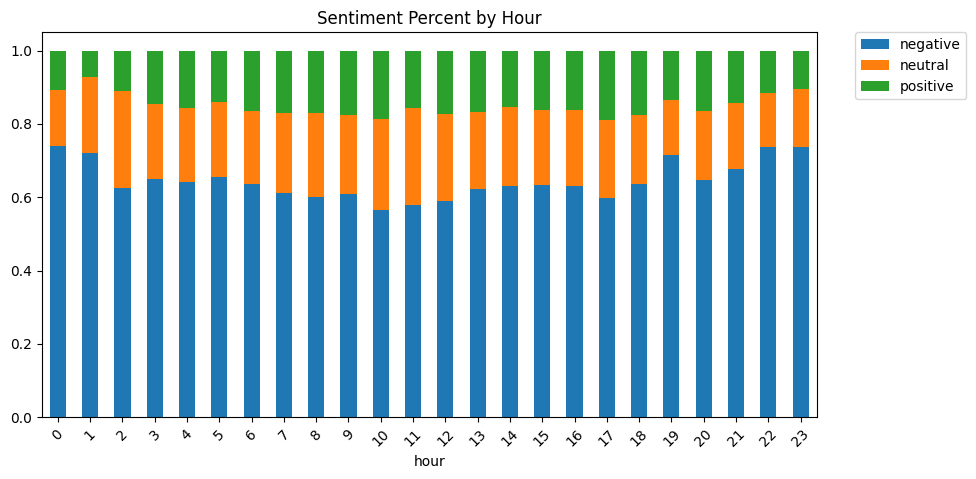

In [97]:
df_sentiment_byhour.plot(x='hour', kind='bar', stacked=True,
        title='Sentiment Percent by Hour')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

####  Statistic Significance<a id='Statistic_Significance_Hour'></a>

In [143]:
#Create a dataframe of sentiments counts by hour
sentiment_byhour_0count = tweets_cleaned[tweets_cleaned.created_hour == 0].airline_sentiment.value_counts().rename_axis().to_frame('0').transpose()
sentiment_byhour_1count = tweets_cleaned[tweets_cleaned.created_hour == 1].airline_sentiment.value_counts().rename_axis().to_frame('1').transpose()
sentiment_byhour_2count = tweets_cleaned[tweets_cleaned.created_hour == 2].airline_sentiment.value_counts().rename_axis().to_frame('2').transpose()
sentiment_byhour_3count = tweets_cleaned[tweets_cleaned.created_hour == 3].airline_sentiment.value_counts().rename_axis().to_frame('3').transpose()
sentiment_byhour_4count = tweets_cleaned[tweets_cleaned.created_hour == 4].airline_sentiment.value_counts().rename_axis().to_frame('4').transpose()
sentiment_byhour_5count = tweets_cleaned[tweets_cleaned.created_hour == 5].airline_sentiment.value_counts().rename_axis().to_frame('5').transpose()
sentiment_byhour_6count = tweets_cleaned[tweets_cleaned.created_hour == 6].airline_sentiment.value_counts().rename_axis().to_frame('6').transpose()
sentiment_byhour_7count = tweets_cleaned[tweets_cleaned.created_hour == 7].airline_sentiment.value_counts().rename_axis().to_frame('7').transpose()
sentiment_byhour_8count = tweets_cleaned[tweets_cleaned.created_hour == 8].airline_sentiment.value_counts().rename_axis().to_frame('8').transpose()
sentiment_byhour_9count = tweets_cleaned[tweets_cleaned.created_hour == 9].airline_sentiment.value_counts().rename_axis().to_frame('9').transpose()
sentiment_byhour_10count = tweets_cleaned[tweets_cleaned.created_hour == 10].airline_sentiment.value_counts().rename_axis().to_frame('10').transpose()
sentiment_byhour_11count = tweets_cleaned[tweets_cleaned.created_hour == 11].airline_sentiment.value_counts().rename_axis().to_frame('11').transpose()
sentiment_byhour_12count = tweets_cleaned[tweets_cleaned.created_hour == 12].airline_sentiment.value_counts().rename_axis().to_frame('12').transpose()
sentiment_byhour_13count = tweets_cleaned[tweets_cleaned.created_hour == 13].airline_sentiment.value_counts().rename_axis().to_frame('13').transpose()
sentiment_byhour_14count = tweets_cleaned[tweets_cleaned.created_hour == 14].airline_sentiment.value_counts().rename_axis().to_frame('14').transpose()
sentiment_byhour_15count = tweets_cleaned[tweets_cleaned.created_hour == 15].airline_sentiment.value_counts().rename_axis().to_frame('15').transpose()
sentiment_byhour_16count = tweets_cleaned[tweets_cleaned.created_hour == 16].airline_sentiment.value_counts().rename_axis().to_frame('16').transpose()
sentiment_byhour_17count = tweets_cleaned[tweets_cleaned.created_hour == 17].airline_sentiment.value_counts().rename_axis().to_frame('17').transpose()
sentiment_byhour_18count = tweets_cleaned[tweets_cleaned.created_hour == 18].airline_sentiment.value_counts().rename_axis().to_frame('18').transpose()
sentiment_byhour_19count = tweets_cleaned[tweets_cleaned.created_hour == 19].airline_sentiment.value_counts().rename_axis().to_frame('19').transpose()
sentiment_byhour_20count = tweets_cleaned[tweets_cleaned.created_hour == 20].airline_sentiment.value_counts().rename_axis().to_frame('20').transpose()
sentiment_byhour_21count = tweets_cleaned[tweets_cleaned.created_hour == 21].airline_sentiment.value_counts().rename_axis().to_frame('21').transpose()
sentiment_byhour_22count = tweets_cleaned[tweets_cleaned.created_hour == 22].airline_sentiment.value_counts().rename_axis().to_frame('22').transpose()
sentiment_byhour_23count = tweets_cleaned[tweets_cleaned.created_hour == 23].airline_sentiment.value_counts().rename_axis().to_frame('23').transpose()

df_sentiment_byhourcount = pd.concat([sentiment_byhour_0count,sentiment_byhour_1count,sentiment_byhour_2count,sentiment_byhour_3count,sentiment_byhour_4count,
                                sentiment_byhour_5count, sentiment_byhour_6count, sentiment_byhour_7count, sentiment_byhour_8count, sentiment_byhour_9count,
                                sentiment_byhour_10count, sentiment_byhour_11count, sentiment_byhour_12count, sentiment_byhour_13count, sentiment_byhour_14count,
                                sentiment_byhour_15count, sentiment_byhour_16count, sentiment_byhour_17count, sentiment_byhour_18count, sentiment_byhour_19count,
                                sentiment_byhour_20count, sentiment_byhour_21count, sentiment_byhour_22count, sentiment_byhour_23count])

chisq_and_posthoc_corrected(df_sentiment_byhourcount)


Significance results:
('0', '1'): p_value: 0.398899; corrected: 0.567505 (ns) reject: False
('0', '2'): p_value: 0.056387; corrected: 0.142777 (ns) reject: False
('0', '3'): p_value: 0.201159; corrected: 0.355896 (ns) reject: False
('0', '4'): p_value: 0.113658; corrected: 0.243175 (ns) reject: False
('0', '5'): p_value: 0.189687; corrected: 0.345735 (ns) reject: False
('0', '6'): p_value: 0.068594; corrected: 0.161811 (ns) reject: False
('0', '7'): p_value: 0.018532; corrected: 0.081188 (*) reject: False
('0', '8'): p_value: 0.008435; corrected: 0.048500 (**) reject: True
('0', '9'): p_value: 0.013026; corrected: 0.062954 (*) reject: False
('0', '10'): p_value: 0.000628; corrected: 0.009633 (***) reject: True
('0', '11'): p_value: 0.001912; corrected: 0.019360 (**) reject: True
('0', '12'): p_value: 0.004177; corrected: 0.031395 (**) reject: True
('0', '13'): p_value: 0.030249; corrected: 0.103071 (*) reject: False
('0', '14'): p_value: 0.049873; corrected: 0.139688 (*) reject: False


#### Hashtags<a id='Hashtags'></a>

In [104]:
import re
United_hashtags = tweets_cleaned[tweets_cleaned.airline == 'United'].text.apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
United_hashtags.columns = ['hashtag','occurences']
United_hashtags[:10]

,hashtag,occurences
482,#unitedairlines,45.0
477,#united,26.0
171,#fail,23.0
129,#customerservice,13.0
491,#unitedsucks,10.0
475,#unfriendlyskies,10.0
69,#avgeek,9.0
487,#unitedfail,7.0
78,#badservice,7.0
317,#neveragain,7.0


In [105]:
#Create dataframes of hashtags and occurances by airlines
Airways_hashtags = tweets_cleaned[tweets_cleaned.airline == 'US Airways'].text.apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
Airways_hashtags.columns = ['hashtag','occurences']

American_hashtags = tweets_cleaned[tweets_cleaned.airline == 'American'].text.apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
American_hashtags.columns = ['hashtag','occurences']

Southwest_hashtags = tweets_cleaned[tweets_cleaned.airline == 'Southwest'].text.apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
Southwest_hashtags.columns = ['hashtag','occurences']

JetBlue_hashtags = tweets_cleaned[tweets_cleaned.airline == 'JetBlue'].text.apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
JetBlue_hashtags.columns = ['hashtag','occurences']

Virgin_hashtags = tweets_cleaned[tweets_cleaned.airline == 'Virgin America'].text.apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
Virgin_hashtags.columns = ['hashtag','occurences']



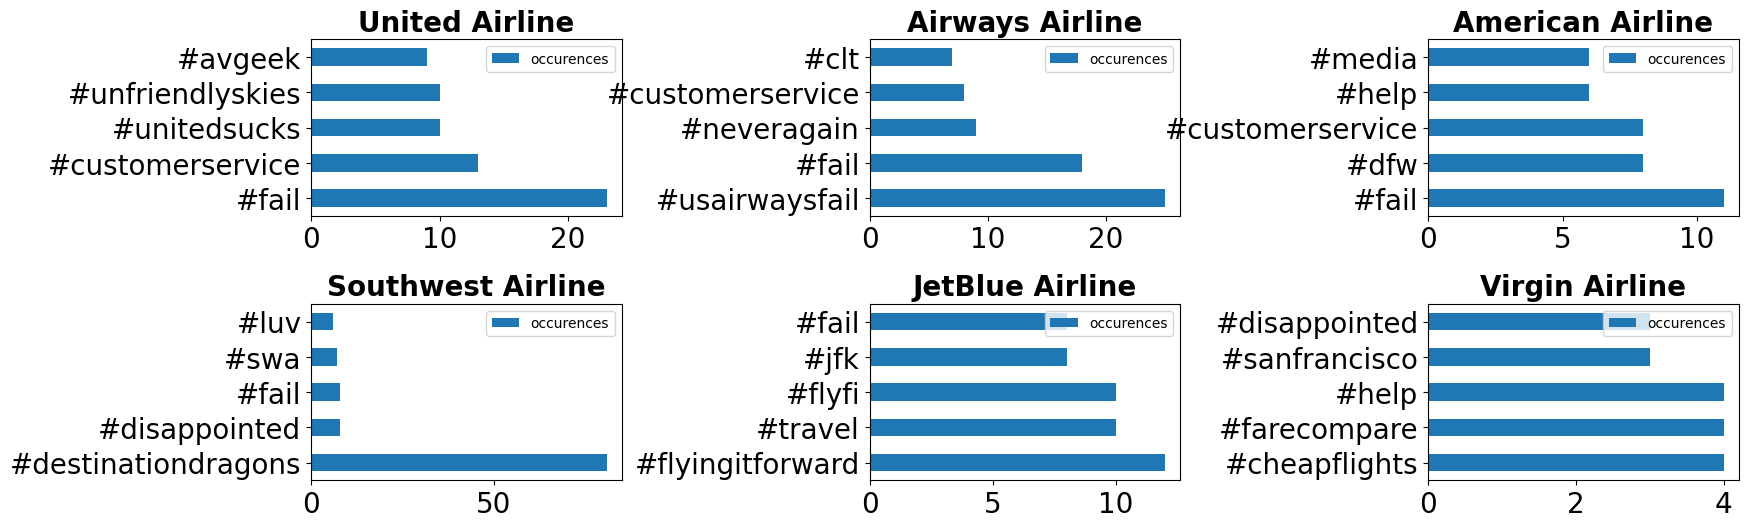

In [106]:
#Plot the dataframes
fig, ax = plt.subplots(2, 3, figsize=(15,5))
fig.tight_layout()

United_hashtags[2:7].plot(kind='barh',x='hashtag', y='occurences',ax=ax[0,0],width = 0.5)
ax[0,0].set_title('United Airline', fontweight="bold", size=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_ylabel('')

Airways_hashtags[1:6].plot(kind='barh',y='occurences',x='hashtag', ax=ax[0,1],width = 0.5)
ax[0,1].set_title('Airways Airline', fontweight="bold", size=20)
ax[0,1].tick_params(labelsize=20)
ax[0,1].set_ylabel('')

American_hashtags[1:6].plot(kind='barh',y='occurences',x='hashtag', ax=ax[0,2],width = 0.5)
ax[0,2].set_title('American Airline', fontweight="bold", size=20)
ax[0,2].tick_params(labelsize=20)
ax[0,2].set_ylabel('')

Southwest_hashtags.iloc[[0,1,2,4,5]].plot(kind='barh',y='occurences',x='hashtag',ax=ax[1,0],width = 0.5)
ax[1,0].set_title('Southwest Airline', fontweight="bold", size=20)
ax[1,0].tick_params(labelsize=20)
ax[1,0].set_ylabel('')

JetBlue_hashtags[1:6].plot(kind='barh',y='occurences',x='hashtag', ax=ax[1,1],width = 0.5)
ax[1,1].set_title('JetBlue Airline', fontweight="bold", size=20)
ax[1,1].tick_params(labelsize=20)
ax[1,1].set_ylabel('')

Virgin_hashtags.iloc[[0,1,2,4,5]].plot(kind='barh',y='occurences',x='hashtag',ax=ax[1,2],width = 0.5)
ax[1,2].set_title('Virgin Airline', fontweight="bold", size=20)
ax[1,2].tick_params(labelsize=20)
ax[1,2].set_ylabel('')

plt.subplots_adjust(wspace=0.8,hspace=0.5);

The hashtag ‘fail’ is one of the top hashtags that appears in all the airlines except Virgin Airlines. ‘Customer service’ is the second most popular hashtag. Many hashtags were related to the location and airports, such as #clt, #dfw, #swa, #jfk, and #sanfrancisco. 

Many other hashtags suggested the specific marketing campaigns and initiatives organized by the airlines, such as  #avgeek (customers submit interesting content on Instagram) from United Airline, #destinationdragons (customers are selected to join Imagine Dragons, -a Germany band - on tour and experience the band performing at 35,000 feet in the sky for a Live at 35 inflight concerts. ) from Southwest Airline, #flyingitforward (a campaign that provides a free flight to a deserving individual in the Social Good campaign ) from JetBlue. 

There are also some hashtags indicating the specific features of airlines, such as ‘flyfi’ (free high-speed wi-fi) from JetBlue, #cheapflights, #farecompare ((FareCompare searches millions of Virgin Atlantic flight quotes hourly for the best airfare deals) from Virgin. 


#### Mentions<a id='Mentions'></a>

In [107]:
#Create dataframes of mentions and occurances by airlines

United_mentions = tweets_cleaned[tweets_cleaned.airline == 'United'].text.apply(lambda x: pd.value_counts(re.findall("@([a-zA-Z0-9_]{1,50})", x)))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
United_mentions.columns = ['mentions','occurences']

Airways_mentions = tweets_cleaned[tweets_cleaned.airline == 'US Airways'].text.apply(lambda x: pd.value_counts(re.findall("@([a-zA-Z0-9_]{1,50})", x)))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
Airways_mentions.columns = ['mentions','occurences']

American_mentions = tweets_cleaned[tweets_cleaned.airline == 'American'].text.apply(lambda x: pd.value_counts(re.findall("@([a-zA-Z0-9_]{1,50})", x)))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
American_mentions.columns = ['mentions','occurences']

Southwest_mentions = tweets_cleaned[tweets_cleaned.airline == 'Southwest'].text.apply(lambda x: pd.value_counts(re.findall("@([a-zA-Z0-9_]{1,50})", x)))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
Southwest_mentions.columns = ['mentions','occurences']

JetBlue_mentions = tweets_cleaned[tweets_cleaned.airline == 'JetBlue'].text.apply(lambda x: pd.value_counts(re.findall("@([a-zA-Z0-9_]{1,50})", x)))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
JetBlue_mentions.columns = ['mentions','occurences']

Virgin_mentions = tweets_cleaned[tweets_cleaned.airline == 'Virgin America'].text.apply(lambda x: pd.value_counts(re.findall("@([a-zA-Z0-9_]{1,50})", x)))\
                     .sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
Virgin_mentions.columns = ['mentions','occurences']


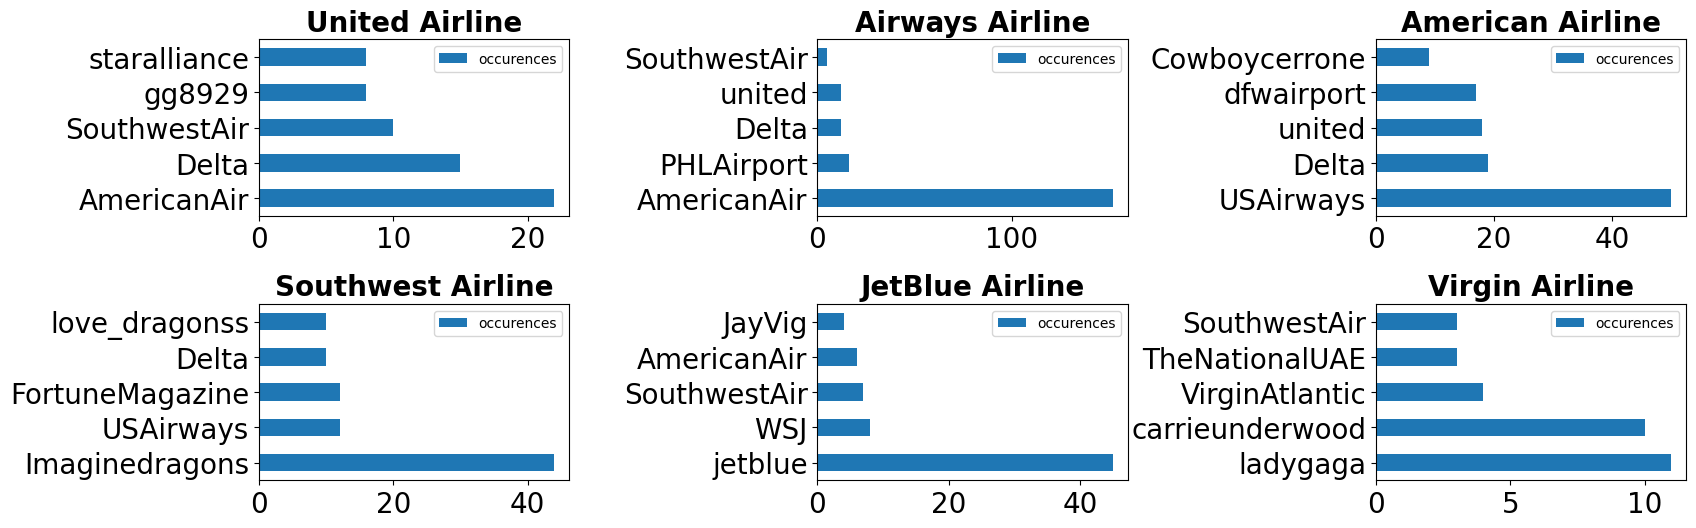

In [108]:
#Plot the dataframes
fig, ax = plt.subplots(2, 3, figsize=(15,5))
fig.tight_layout()

United_mentions[2:7].plot(kind='barh',x='mentions', y='occurences',ax=ax[0,0],width = 0.5)
ax[0,0].set_title('United Airline', fontweight="bold", size=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_ylabel('')

Airways_mentions.iloc[[1,3,4,5,6]].plot(kind='barh',y='occurences',x='mentions', ax=ax[0,1],width = 0.5)
ax[0,1].set_title('Airways Airline', fontweight="bold", size=20)
ax[0,1].tick_params(labelsize=20)
ax[0,1].set_ylabel('')
                      
American_mentions.iloc[[1,3,4,5,6]].plot(kind='barh',y='occurences',x='mentions', ax=ax[0,2],width = 0.5)
ax[0,2].set_title('American Airline', fontweight="bold", size=20)
ax[0,2].tick_params(labelsize=20)
ax[0,2].set_ylabel('')

Southwest_mentions[2:7].plot(kind='barh',y='occurences',x='mentions',ax=ax[1,0],width = 0.5)
ax[1,0].set_title('Southwest Airline', fontweight="bold", size=20)
ax[1,0].tick_params(labelsize=20)
ax[1,0].set_ylabel('')

JetBlue_mentions[1:6].plot(kind='barh',y='occurences',x='mentions', ax=ax[1,1],width = 0.5)
ax[1,1].set_title('JetBlue Airline', fontweight="bold", size=20)
ax[1,1].tick_params(labelsize=20)
ax[1,1].set_ylabel('')

Virgin_mentions[2:7].plot(kind='barh',y='occurences',x='mentions',ax=ax[1,2],width = 0.5)
ax[1,2].set_title('Virgin Airline', fontweight="bold", size=20)
ax[1,2].tick_params(labelsize=20)
ax[1,2].set_ylabel('')

plt.subplots_adjust(wspace=0.8,hspace=0.5);

There are many themes in the mentions. There are mentions of other airlines for comparisons or listing similar issues with a negative connotation. Some mentions include specific airports, such as @PHLAirport, and @dfwairport. Some mentions suggest the trending search related to the airline or not, such as @lady gaga, @CarrieUnderwood for their academy awards entertainment performance,@ gg8929 for the incidence of a canceled flight with the bad exchange rate, @Cowboycerrone for cowboy Cerrone’s frustration with American Airline, @Imaginedragons for the Imagine Dragons band inflight performance in Southwest flights, @The NationalUAE for the report of US fines Virgin Atlantic for flying over Iraq. 


#### Textstat<a id='Textstat'></a>

##### Text Difficulty<a id='Difficulty'></a>

In [109]:
import textstat
from collections import namedtuple
negative_text = tweets_cleaned[tweets_cleaned.airline_sentiment == 'negative'].text
textstat.flesch_reading_ease(str(negative_text))

71.0

In [110]:
positive_text = tweets_cleaned[tweets_cleaned.airline_sentiment == 'positive'].text
textstat.flesch_reading_ease(str(positive_text))

72.63

In [111]:
neutral_text = tweets_cleaned[tweets_cleaned.airline_sentiment == 'neutral'].text
textstat.flesch_reading_ease(str(neutral_text))

63.66

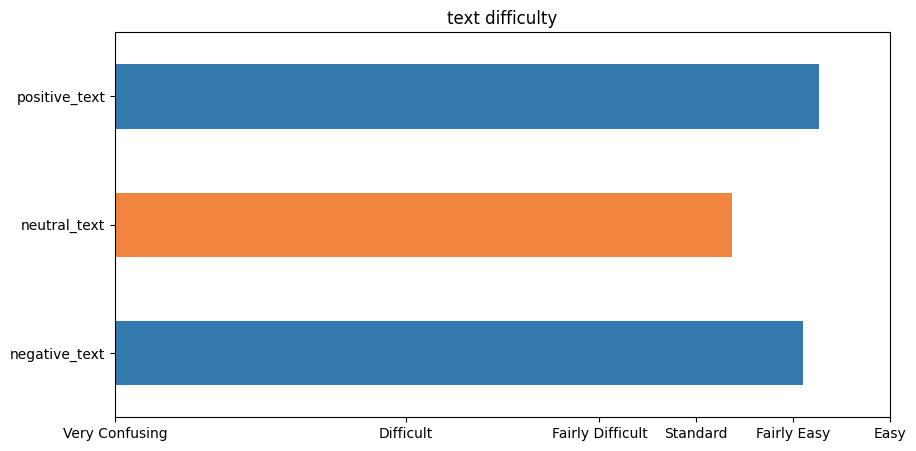

In [112]:
#Plot the data
data = {'score':[71,63.66,72.63]}
textstat_df = pd.DataFrame(data, index = ['negative_text', 'neutral_text', 'positive_text'])

colors=['#357AAF', '#F1843E', '#357AAF']
ax=textstat_df.plot(kind='barh')
for patch,color in zip(ax.patches,colors):
    patch.set_facecolor(color)
    
ax.get_legend().remove()

plt.title('text difficulty')
plt.xticks([0, 30, 50, 60,70,80],labels = ['Very Confusing','Difficult', 'Fairly Difficult', 'Standard','Fairly Easy', 'Easy'])
plt.show()

It shows that positive and negative texts have similar difficulty - 'fairly easy' on the difficulty scale, while neutral texts tend to be a little more complicated but still in the range of 'standard.' 

##### Text Length<a id='Length'></a>

In [113]:
#Text length for negative texts

lines_neg=0
wordCount_neg=0
mostWordsInLine_neg = 0


for lineOfText in negative_text:
    lines_neg += 1
    f1=lineOfText.split()
    wordCount_neg=wordCount_neg+len(f1)
    if len(f1) > mostWordsInLine_neg:
        mostWordsInLine_neg = len(f1)
print ("Average words per line for negative text: {}".format(wordCount_neg/lines_neg))
print ("Most words in a single line for negative text: {}".format(mostWordsInLine_neg))


Average words per line for negative text: 19.686206145129656
Most words in a single line for negative text: 36


In [114]:
#Text length for neutral texts

lines_neutral=0
wordCount_neutral=0
mostWordsInLine_neutral = 0


for lineOfText in neutral_text:
    lines_neutral += 1
    f1=lineOfText.split()
    wordCount_neutral=wordCount_neutral+len(f1)
    if len(f1) > mostWordsInLine_neutral:
        mostWordsInLine_neutral = len(f1)
print ("Average words per line for negative text: {}".format(wordCount_neutral/lines_neutral))
print ("Most words in a single line for negative text: {}".format(mostWordsInLine_neutral))


Average words per line for negative text: 14.408841561794127
Most words in a single line for negative text: 31


In [115]:
#Text length for positive texts

lines_pos=0
wordCount_pos=0
mostWordsInLine_pos = 0


for lineOfText in positive_text:
    lines_pos += 1
    f1=lineOfText.split()
    wordCount_pos=wordCount_pos+len(f1)
    if len(f1) > mostWordsInLine_pos:
        mostWordsInLine_pos = len(f1)
print ("Average words per line for negative text: {}".format(wordCount_pos/lines_pos))
print ("Most words in a single line for negative text: {}".format(mostWordsInLine_pos))


Average words per line for negative text: 14.0131189166314
Most words in a single line for negative text: 31


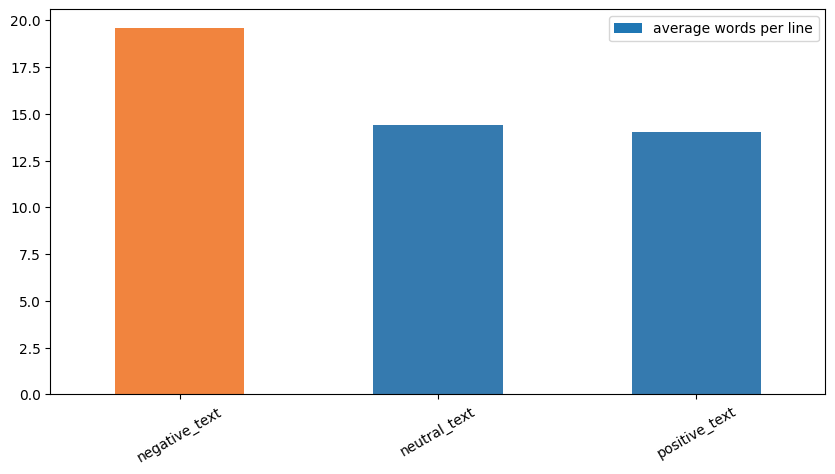

In [116]:
#Plot the data
data_length = {'average words per line':[19.6,14.4,14]}
text_length_df = pd.DataFrame(data_length, index = ['negative_text', 'neutral_text', 'positive_text'])
ax=text_length_df.plot(kind='bar')
colors=['#F1843E','#357AAF','#357AAF']
for patch,color in zip(ax.patches,colors):
    patch.set_facecolor(color)
plt.xticks(rotation = 30)
plt.show()

The negative text has longer words per line than the neutral and positive text. Neutral text and positive text have similar words per line. 


### Save The Data<a id='Save_The_Data'></a>
***

In [117]:
tweets_n = tweets_cleaned.copy()
tweets_n.to_csv('../data/tweets_n.csv')
